In [2]:
!pip install control

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl



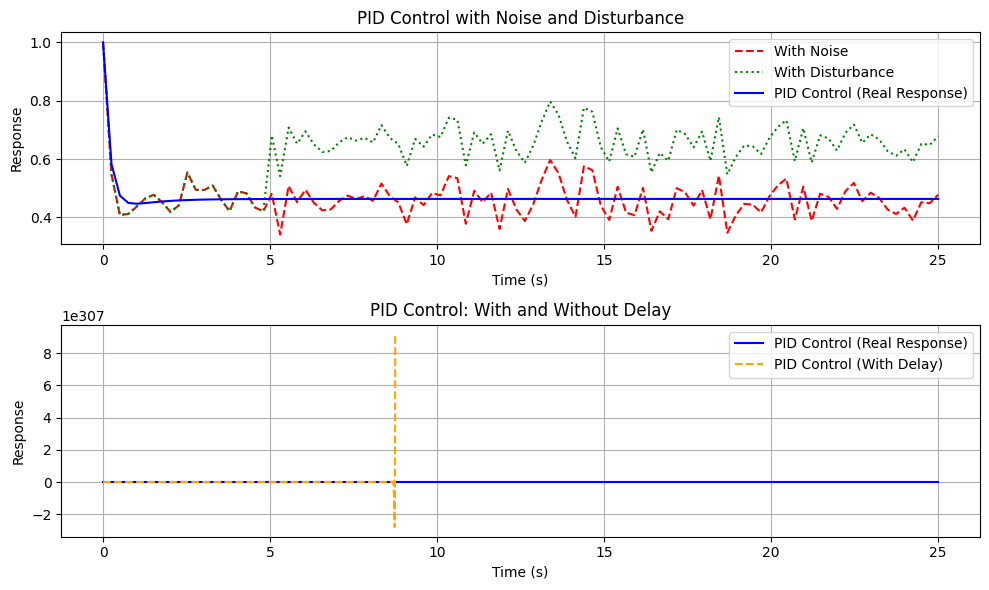

In [58]:
num = [1, 0]
den = [1, 1]
system = ctrl.TransferFunction(num, den)

Kp_crit = 1.8  # مقدار تقریبی بهره بحرانی
T_crit = 2.5  # دوره نوسان بحرانی

Kp = 0.6 * Kp_crit
Ki = 1.2 * Kp_crit / T_crit
Kd = 0.075 * Kp_crit * T_crit

# تعریف کنترل‌کننده PID
pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

closed_loop = ctrl.feedback(pid_controller * system)
time, response = ctrl.step_response(closed_loop)

# add noise
noise = np.random.normal(0, 0.05, len(time))  # نویز گاوسی کوچک
response_with_noise = response + noise

# disturbance t=5
disturbance = np.heaviside(time - 5, 1) * 0.2  # اغتشاش به اندازه 0.2 بعد از 5 ثانیه
response_with_disturbance = response_with_noise + disturbance

#add delay
L = 0.5
num_delay, den_delay = ctrl.pade(L, 10)  # تقریب تأخیر پاده
system_delay = ctrl.TransferFunction(num_delay, den_delay)
system_with_delay = ctrl.series(system_delay, system)


closed_loop_with_delay = ctrl.feedback(pid_controller * system_with_delay)
time_delay, response_delay = ctrl.step_response(closed_loop_with_delay)


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, response_with_noise, label='With Noise', linestyle='dashed', color='r')
plt.plot(time, response_with_disturbance, label='With Disturbance', linestyle='dotted', color='g')
plt.plot(time, response, label='PID Control (Real Response)', color='b', linestyle='solid')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('PID Control with Noise and Disturbance')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, response, label='PID Control (Real Response)', color='b', linestyle='solid')
plt.plot(time_delay, response_delay, label='PID Control (With Delay)', color='orange', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('PID Control: With and Without Delay')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [60]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.0 MB/s eta 0:00:00


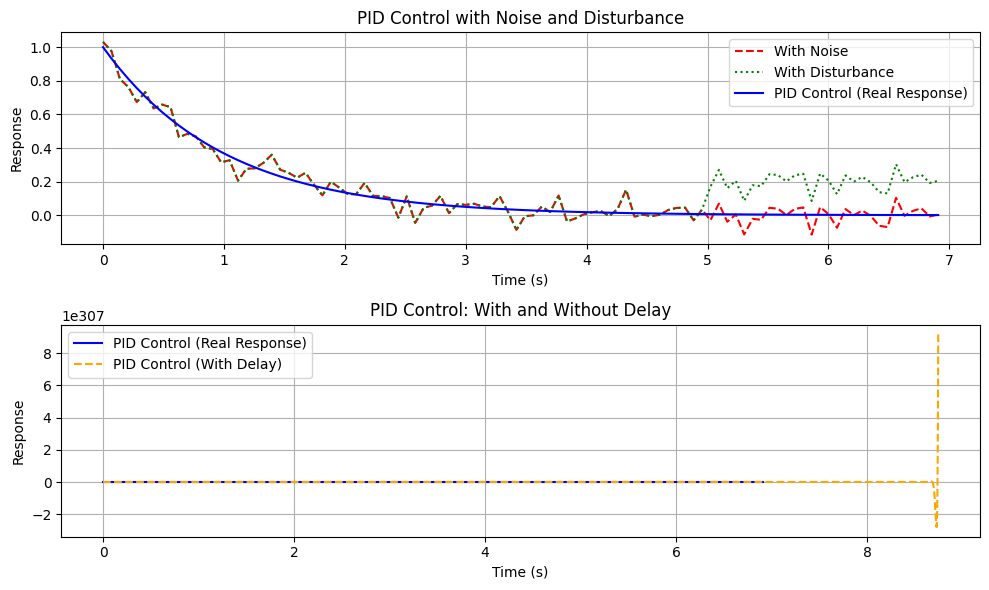

In [62]:
# تعریف متغیرهای فازی
error = ctrl_fuzzy.Antecedent(np.arange(-1, 1, 0.1), 'Error')
error_dot = ctrl_fuzzy.Antecedent(np.arange(-1, 1, 0.1), 'Error_Dot')

kp = ctrl_fuzzy.Consequent(np.arange(0, 10, 0.1), 'Kp')
ki = ctrl_fuzzy.Consequent(np.arange(0, 10, 0.1), 'Ki')
kd = ctrl_fuzzy.Consequent(np.arange(0, 10, 0.1), 'Kd')

# تخصیص توابع عضویت به ورودی‌ها
error.automf(3)  # سه سطح: کم، متوسط، زیاد
error_dot.automf(3)  # سه سطح: کم، متوسط، زیاد

# تخصیص توابع عضویت به خروجی‌ها
kp['low'] = fuzz.trimf(kp.universe, [0, 0, 5])
kp['medium'] = fuzz.trimf(kp.universe, [0, 5, 10])
kp['high'] = fuzz.trimf(kp.universe, [5, 10, 10])

ki['low'] = fuzz.trimf(ki.universe, [0, 0, 5])
ki['medium'] = fuzz.trimf(ki.universe, [0, 5, 10])
ki['high'] = fuzz.trimf(ki.universe, [5, 10, 10])

kd['low'] = fuzz.trimf(kd.universe, [0, 0, 5])
kd['medium'] = fuzz.trimf(kd.universe, [0, 5, 10])
kd['high'] = fuzz.trimf(kd.universe, [5, 10, 10])

# تعریف قوانین فازی
rule1 = ctrl_fuzzy.Rule(error['poor'] & error_dot['poor'], (kp['low'], ki['low'], kd['low']))
rule2 = ctrl_fuzzy.Rule(error['average'] & error_dot['average'], (kp['medium'], ki['medium'], kd['medium']))
rule3 = ctrl_fuzzy.Rule(error['good'] & error_dot['good'], (kp['high'], ki['high'], kd['high']))

# سیستم فازی
pid_control = ctrl_fuzzy.ControlSystem([rule1, rule2, rule3])
pid_simulation = ctrl_fuzzy.ControlSystemSimulation(pid_control)

# شبیه‌سازی پاسخ سیستم بدون تأخیر
time, response = ctrl.step_response(system)

# اضافه کردن نویز به پاسخ
noise = np.random.normal(0, 0.05, len(time))  # نویز گاوسی کوچک
response_with_noise = response + noise

# اضافه کردن اغتشاش در t=5
disturbance = np.heaviside(time - 5, 1) * 0.2  # اغتشاش به اندازه 0.2 بعد از 5 ثانیه
response_with_disturbance = response_with_noise + disturbance

# اضافه کردن تأخیر به سیستم
L = 0.5
num_delay, den_delay = ctrl.pade(L, 10)  # تقریب تأخیر پاده
system_delay = ctrl.TransferFunction(num_delay, den_delay)
system_with_delay = ctrl.series(system_delay, system)

# سیستم حلقه بسته با تأخیر و کنترل‌کننده PID
closed_loop_with_delay = ctrl.feedback(pid_controller * system_with_delay)
time_delay, response_delay = ctrl.step_response(closed_loop_with_delay)

# ورودی‌های سیستم فازی (خطا و تغییرات خطا)
for t in range(len(time)):
    error_input = response[t] - response[t-1] if t > 0 else 0
    error_dot_input = (response[t] - response[t-1]) - (response[t-1] - response[t-2]) if t > 1 else 0
    pid_simulation.input['Error'] = error_input
    pid_simulation.input['Error_Dot'] = error_dot_input
    pid_simulation.compute()

    # استفاده از خروجی‌های فازی برای تعیین ضرایب PID
    Kp_fuzzy = pid_simulation.output['Kp']
    Ki_fuzzy = pid_simulation.output['Ki']
    Kd_fuzzy = pid_simulation.output['Kd']

# رسم نمودار
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, response_with_noise, label='With Noise', linestyle='dashed', color='r')
plt.plot(time, response_with_disturbance, label='With Disturbance', linestyle='dotted', color='g')
plt.plot(time, response, label='PID Control (Real Response)', color='b', linestyle='solid')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('PID Control with Noise and Disturbance')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, response, label='PID Control (Real Response)', color='b', linestyle='solid')
plt.plot(time_delay, response_delay, label='PID Control (With Delay)', color='orange', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('PID Control: With and Without Delay')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
